# 2. Descriptive analytics

## 2.1 Preparation

### 2.1.1 Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import folium as fo
from folium import Map
from folium.plugins import HeatMap

### 2.1.2 Import data

In [2]:
filepath = 'data/'

In [3]:
trip_data = pd.read_pickle(filepath+'trip_data.pkl')
weather_data = pd.read_pickle(filepath+'weather_data.pkl')
station_data = pd.read_pickle(filepath+'station_data.pkl')
geo_data = pd.read_pickle(filepath+'geo_data.pkl')

In [4]:
trip_data.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,start_hour,weekday,month,duration
0,2018-01-01 00:16:33,2018-01-01 00:23:01,178,107,MIT Pacific St at Purrington St,Ames St at Main St,643,Subscriber,0,0,1,388
1,2018-01-01 00:42:00,2018-01-01 00:46:25,78,225,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,1581,Subscriber,0,0,1,265
2,2018-01-01 00:42:44,2018-01-01 01:02:11,16,76,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,173,Subscriber,0,0,1,1167
3,2018-01-01 00:56:50,2018-01-01 01:11:06,69,177,Coolidge Corner - Beacon St @ Centre St,University Park,1772,Subscriber,0,0,1,856
4,2018-01-01 01:07:54,2018-01-01 01:16:02,4,46,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,1183,Subscriber,1,0,1,488


In [5]:
weather_data.head()

,date_time,max_temp,min_temp,precip
0,2018-01-01 00:00:00,-12.8,-12.8,0.0
1,2018-01-01 01:00:00,-13.3,-13.3,0.0
2,2018-01-01 02:00:00,-13.9,-13.9,0.0
3,2018-01-01 03:00:00,-14.4,-14.4,0.0
4,2018-01-01 04:00:00,-15.0,-15.0,0.0


In [6]:
station_data.head()

,station_id,station_name,latitude,longitude,district,is_public,total_docks,deployment_year
0,K32015,1200 Beacon St,42.344149,-71.114674,Brookline,Yes,15,2021
1,W32006,160 Arsenal,42.364664,-71.175694,Watertown,Yes,11,2021
2,A32019,175 N Harvard St,42.363796,-71.129164,Boston,Yes,17,2014
3,S32035,191 Beacon St,42.380323,-71.108786,Somerville,Yes,19,2018
4,C32094,2 Hummingbird Lane at Olmsted Green,42.288870,-71.095003,Boston,Yes,17,2020


In [7]:
geo_data.head()

,start_time,end_time,start_station_name,end_station_name,start_lat,start_lon,end_lat,end_lon
0,2018-01-01 00:16:33,2018-01-01 00:23:01,MIT Pacific St at Purrington St,Ames St at Main St,42.359573,-71.101295,42.362500,-71.088220
1,2018-01-01 00:42:00,2018-01-01 00:46:25,Union Square - Somerville,Cambridge Dept. of Public Works -147 Hampshire...,42.379648,-71.095405,42.371197,-71.097599
2,2018-01-01 00:42:44,2018-01-01 01:02:11,Back Bay T Stop - Dartmouth St at Stuart St,Central Sq Post Office / Cambridge City Hall a...,42.348074,-71.076570,42.366426,-71.105495
3,2018-01-01 00:56:50,2018-01-01 01:11:06,Coolidge Corner - Beacon St at Centre St,University Park,42.341598,-71.123338,42.362648,-71.100061
4,2018-01-01 01:07:54,2018-01-01 01:16:02,Tremont St at E Berkeley St,Christian Science Plaza - Massachusetts Ave at...,42.345392,-71.069616,42.343666,-71.085824


## 2.2 Temporal Demand Patterns and Seasonality

In this section, we take a look at the temporal side of data. We do it by observing the amount of trips registered during a day, a week and a year.

In [8]:
#group by hour and count the number of trips for each hour
trips_hour = trip_data.groupby('start_hour').size()

#group by weekday and count the number of trips for each weekday
trips_day = trip_data.groupby('weekday').size()

#group by month and count the number of trips for each month
trips_month = trip_data.groupby('month').size()

### 2.2.1 Fleet usage variance during a day

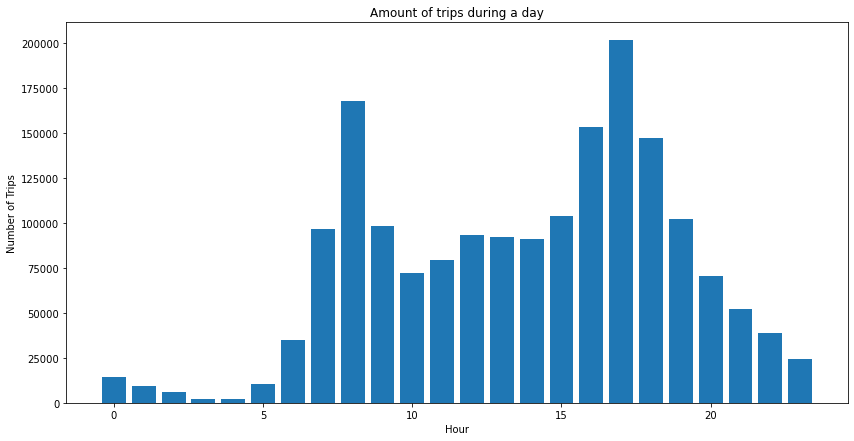

In [9]:
# create a diagram for the amount of trips for each hour
plots_trips_hour, axes_trips_hour = plt.subplots(figsize = (14,7))

axes_trips_hour.bar(trips_hour.index.values, trips_hour.values)
axes_trips_hour.axis('tight')
axes_trips_hour.set_title('Amount of trips during a day')
axes_trips_hour.set_xlabel('Hour')
axes_trips_hour.set_ylabel('Number of Trips')

# plot the diagram
plt.show()

As we can see here, the most popular times for renting a bike are around 8 am and around 5 pm. It can be explained by typical working hours (9-5) or students going to school / university. Demand during the day is also quite high, and it sharply declines after 11 pm, when most people go to sleep.

### 2.2.2 Fleet usage variance during a week

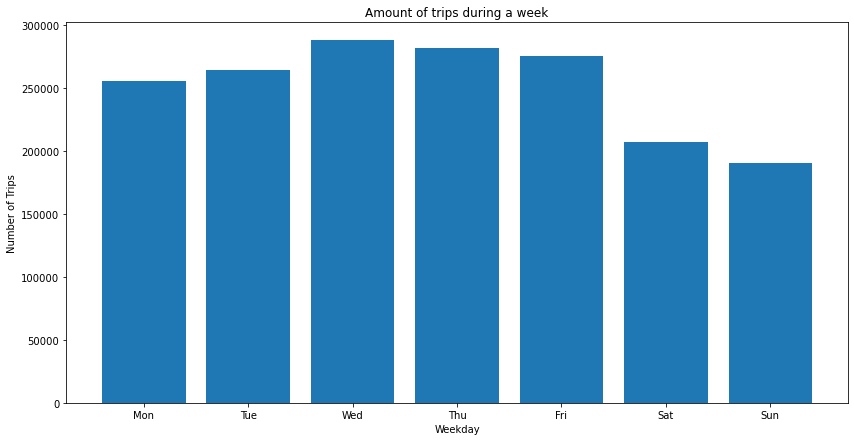

In [10]:
# create a list of weekdays to use in the graph
weekday_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# create a diagram for the amount of trips for each weekday
plots_trips_day, axes_trips_day = plt.subplots(figsize = (14,7))

axes_trips_day.bar(trips_day.index.values, trips_day.values)
axes_trips_day.axis('tight')
axes_trips_day.set_title('Amount of trips during a week')
axes_trips_day.set_xlabel('Weekday')
axes_trips_day.set_ylabel('Number of Trips')
axes_trips_day.set_xticks(trips_day.index)
axes_trips_day.set_xticklabels(weekday_list)

# plot the diagram
plt.show()

The amount of rides taken during working days is higher than during the weekend. It could be explained by the same factors which influenced bike usage during the day: people going to work/school. Most people have Saturdays and Sundays off, hence lower bike usage frequency.

### 2.2.3 Fleet usage variance during a year

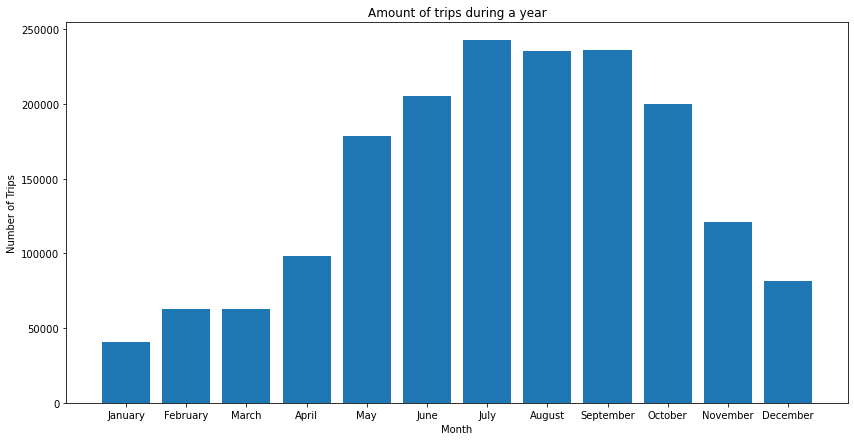

In [11]:
# create a list of months to use in the graph
months_list = ['January','February','March','April','May','June','July','August','September','October','November','December']

# create a diagram for the amount of trips for each month
plots_trips_month, axes_trips_month = plt.subplots(figsize = (14,7))

axes_trips_month.bar(trips_month.index.values, trips_month.values)
axes_trips_month.axis('tight')
axes_trips_month.set_title('Amount of trips during a year')
axes_trips_month.set_xlabel('Month')
axes_trips_month.set_ylabel('Number of Trips')
axes_trips_month.set_xticks(trips_month.index)
axes_trips_month.set_xticklabels(months_list)

# plot the diagram
plt.show()

On the graph we can see that the demand for bike sharing has a strong seasonality aspect. During colder months (November through April) demand stays relatively low, whereas from May to October it is much higher. It could be explained by people's preference to ride a bike when it's warm outside, rather then in the cold.

### 2.2.4 Fleet usage variance during a workday vs the weekend?

We will now take a look at during which hours the bikes are used during a weekday vs on the weekend, and try to draw some insights from it.

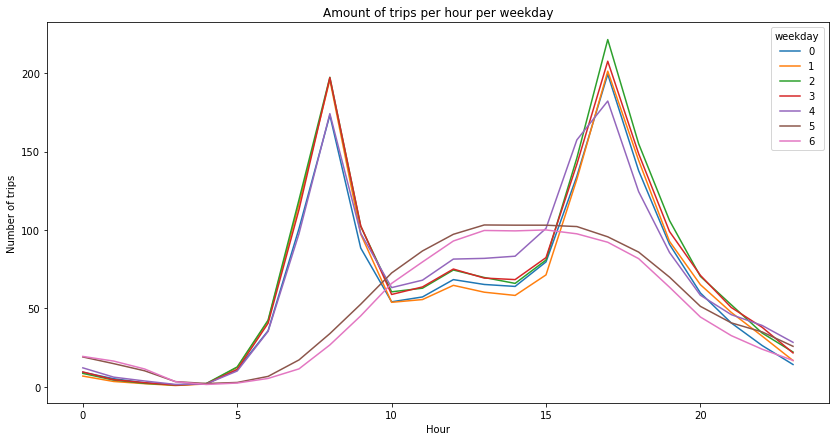

In [12]:
# transform the data for the diagram
trips_hour_weekday = trip_data.groupby(['start_hour','weekday']).count()
trips_hour_weekday = trips_hour_weekday['duration'].unstack()

# divide by 168 (1 week is 7 days @ 24 hours) to get the average trips per hour
trips_hour_weekday = trips_hour_weekday/168

# create the diagram
plots_hour_weekday, axes_hour_weekday = plt.subplots(figsize=(14,7))
trips_hour_weekday.plot(ax=axes_hour_weekday)
plt.title('Amount of trips per hour per weekday')
plt.xlabel('Hour')
plt.ylabel('Number of trips')

plt.show()

We can see that demand patterns for weekdays and the weekend are drastically different. On Monday through Friday the demands follows the pattern which we observed earlier: peak times are around 9am-5pm. On the weekend the demand is more uniform and is mostly distributed between 9 am and 9 pm, peaking around 1pm-4pm. It could be explained by people using the bikes for leisure, rather then going to school and work.

Another interesring insight is the demand on Fridays. We can see that the demand is higher starting from noon, and is lower at 5 pm compared to other weekdays. This could mean that people leave work earlier on Friday or have less classes at school / university.

## 2.3 Geographical Demand Patterns

In this section, we observe the geographical distribution of the shared bikes data. We intend to investigate which stations are the most popular, which are the least popular and which trip routes are taken the most.

### 2.3.1 Frequency of stations usage

To start the analysis, we would like to look at the stations where demand is the highest and the lowest, and try to rationalize the reasons for it.

In [13]:
# group the dataset to find out the station use frequency
start_station_freq = trip_data.groupby('start_station_id').size()
end_station_freq = trip_data.groupby('end_station_id').size()

In [14]:
# find out the 10 most used stations and save them in a dictionary
most_used_stations = dict()
most_used_stations['start'] = start_station_freq.nlargest(10, keep = 'all')
most_used_stations['end'] = end_station_freq.nlargest(10, keep = 'all')

In [15]:
# create a mapping dataframe to assign station IDs to station names
station_mapping = trip_data[['start_station_id', 'start_station_name']].drop_duplicates().set_index('start_station_id')
station_mapping = station_mapping[~station_mapping.index.duplicated(keep='first')]

In [16]:
# split the dictionary into start and end stations
for type in most_used_stations:
    print(f'These are the 10 most used {type} stations:')
        
    # map the station ID with its name and print out the top 10 stations 
    for station in most_used_stations[type].iteritems():
        print("Station ID %s: '%s' used %d times" % (station[0], station_mapping.loc[station[0], 'start_station_name'], station[1]))
    print('\n')

These are the 10 most used start stations:
Station ID 67: 'MIT at Mass Ave / Amherst St' used 53820 times
Station ID 80: 'MIT Stata Center at Vassar St / Main St' used 41537 times
Station ID 68: 'Central Square at Mass Ave / Essex St' used 37330 times
Station ID 22: 'South Station - 700 Atlantic Ave' used 36274 times
Station ID 178: 'MIT Pacific St at Purrington St' used 29375 times
Station ID 190: 'Nashua Street at Red Auerbach Way' used 28561 times
Station ID 189: 'Kendall T' used 28444 times
Station ID 74: 'Harvard Square at Mass Ave/ Dunster' used 25969 times
Station ID 36: 'Copley Square - Dartmouth St at Boylston St' used 25010 times
Station ID 179: 'MIT Vassar St' used 23590 times


These are the 10 most used end stations:
Station ID 67: 'MIT at Mass Ave / Amherst St' used 49602 times
Station ID 80: 'MIT Stata Center at Vassar St / Main St' used 46345 times
Station ID 190: 'Nashua Street at Red Auerbach Way' used 37823 times
Station ID 68: 'Central Square at Mass Ave / Essex St'

As we can see, most of the popular stations are located near important landmarks or popular city buildings. Examples of such stations would be those near MIT or Harvard, where many students go to lectures, or near Central Square, where there is a large traffic of people at any day. Train stations (South Station) are also very popular, most likely because commuters use bikes after getting off the train or before taking one.

Additionally, there are many similarities between the popular start and end stations. It makes sense, as a lot of people (e.g. students and workers) would use these stations twice a day, first to commute to work and then to commute back home.

From the business prospective, these stations are vital and increased attention should be brought to them to make sure they continue operating smoothly.

We will now take a look at the least used stations.

In [17]:
# find out the 10 least used stations and save them in a dictionary
least_used_stations = dict()
least_used_stations['start'] = start_station_freq.nsmallest(10, keep = 'all')
least_used_stations['end'] = end_station_freq.nsmallest(10, keep = 'all')

In [18]:
# split the dictionary into start and end stations
for type in most_used_stations:
    print(f'These are the 10 least used {type} stations:')
        
    # map the station ID with its name and print out the top 10 stations 
    for station in least_used_stations[type].iteritems():
        print("Station ID %s: used %d times" % (station[0], station[1]))
    print('\n')

These are the 10 least used start stations:
Station ID 158: used 2 times
Station ID 229: used 3 times
Station ID 368: used 3 times
Station ID 343: used 4 times
Station ID 353: used 5 times
Station ID 373: used 9 times
Station ID 340: used 11 times
Station ID 347: used 13 times
Station ID 306: used 15 times
Station ID 350: used 19 times


These are the 10 least used end stations:
Station ID 164: used 1 times
Station ID 229: used 1 times
Station ID 158: used 2 times
Station ID 230: used 2 times
Station ID 368: used 3 times
Station ID 340: used 8 times
Station ID 347: used 8 times
Station ID 343: used 9 times
Station ID 353: used 11 times
Station ID 373: used 11 times




Note that for the least popular stations the names are omitted, as the provided data had no names for some of the stations. It is safe to say that with less than 20 usages over a whole year, these are abnormal stations. These stations are either extremely distant, or, which is more likely, discontinued, activated by accident or an erroneous entry in the data. Still, we kept them inside the dataset.

From the business prospective, these stations bring almost 0 use and considerations should be made about their future.

### 2.3.2 Frequency of taken trips

After taking a look at the stations, we will now investigate which trips are the most popular among Bluebike users. Knowing about the trip density is important because it shows where the hotspots in the city are, and where more bikes are possibly needed. Moreover, this map could be used by the city to implement additional traffic rules and precautions to protect the riders.

We will create a visualisation heatmap which shows the density of taken trips on the map of Boston. The following  visualisation was inspired by Aly Sevji from https://alysivji.github.io/getting-started-with-folium.html

In [19]:
def map_points(df, lat_col='latitude', lon_col='longitude', zoom_start=12, \
                plot_points=False, pt_radius=15, \
                draw_heatmap=False, heat_map_weights_col=None, \
                heat_map_weights_normalize=True, heat_map_radius=15):
    
    """Creates a map given a dataframe of points. Can also produce a heatmap overlay

    Arg:
        df: dataframe containing points to maps
        lat_col: Column containing latitude (string)
        lon_col: Column containing longitude (string)
        zoom_start: Integer representing the initial zoom of the map
        plot_points: Add points to map (boolean)
        pt_radius: Size of each point
        draw_heatmap: Add heatmap to map (boolean)
        heat_map_weights_col: Column containing heatmap weights
        heat_map_weights_normalize: Normalize heatmap weights (boolean)
        heat_map_radius: Size of heatmap point

    Returns:
        folium map object
    """

    # center map in the middle of points center in
    middle_lat = df[lat_col].median()
    middle_lon = df[lon_col].median()

    curr_map = fo.Map(location=[middle_lat, middle_lon],
                          zoom_start=zoom_start)

    # add points to map
    if plot_points:
        for _, row in df.iterrows():
            fo.CircleMarker([row[lat_col], row[lon_col]],
                                radius=pt_radius,
                               # popup=row['name'],
                                fill_color="#3db7e4", # divvy color
                               ).add_to(curr_map)

    # add heatmap
    if draw_heatmap:
        # convert to (n, 2) or (n, 3) matrix format
        if heat_map_weights_col is None:
            cols_to_pull = [lat_col, lon_col]
        else:
            # if we have to normalize
            if heat_map_weights_normalize:
                df[heat_map_weights_col] = \
                    df[heat_map_weights_col] / df[heat_map_weights_col].sum()

            cols_to_pull = [lat_col, lon_col, heat_map_weights_col]

        stations = df[cols_to_pull]
        curr_map.add_child(fo.plugins.HeatMap(stations, radius=heat_map_radius))


        return curr_map

In [20]:
# fit geo_data dataset to the function
trips_count = geo_data.groupby(['start_lat', 'start_lon']).size().reset_index(name='counts')

In [21]:
# visualize the heatmap
trips_heatmap = map_points(trips_count, \
                   lat_col='start_lat', \
                   lon_col='start_lon', \
                   plot_points=True, \
                   draw_heatmap=True, \
                   heat_map_weights_normalize=True,\
                   pt_radius = 1, \
                   heat_map_radius = 20,\
                   heat_map_weights_col='counts') 

In [22]:
trips_heatmap

In addition to the map visualisation, we will list the most taken trips in text format.

In [23]:
# group the dataset to find out the trips frequency
trips_freq = trip_data.groupby(['start_station_id', 'end_station_id']).size()

# find out the 15 most popular trips
trips_freq = trips_freq.nlargest(15, keep = 'all')

# map the station IDs with their names and print out the top 15 trips
print('These are 15 most taken trips:')
for trip in trips_freq.iteritems():
    print('Start: "%s" to finish: "%s"' % (station_mapping.loc[trip[0][0], 'start_station_name'], station_mapping.loc[trip[0][1], 'start_station_name']))
    

These are 15 most taken trips:
Start: "Beacon St at Massachusetts Ave" to finish: "MIT at Mass Ave / Amherst St"
Start: "MIT at Mass Ave / Amherst St" to finish: "Beacon St at Massachusetts Ave"
Start: "MIT Pacific St at Purrington St" to finish: "MIT Stata Center at Vassar St / Main St"
Start: "MIT Vassar St" to finish: "MIT Stata Center at Vassar St / Main St"
Start: "MIT Stata Center at Vassar St / Main St" to finish: "MIT Pacific St at Purrington St"
Start: "MIT at Mass Ave / Amherst St" to finish: "MIT Vassar St"
Start: "MIT Pacific St at Purrington St" to finish: "MIT at Mass Ave / Amherst St"
Start: "Central Square at Mass Ave / Essex St" to finish: "MIT Pacific St at Purrington St"
Start: "MIT at Mass Ave / Amherst St" to finish: "MIT Pacific St at Purrington St"
Start: "MIT Vassar St" to finish: "MIT at Mass Ave / Amherst St"
Start: "MIT Stata Center at Vassar St / Main St" to finish: "MIT Vassar St"
Start: "MIT at Mass Ave / Amherst St" to finish: "Central Square at Mass Ave 

There are many similarities between the most popular trips and most popular stations. However, here the MIT stands out. It seems that a massive amount of students/employees of MIT are frequently using bike sharing to get to / back from the MIT.

## 2.4 Key Performance Indicators (KPIs)

In this section, we introduce 4 KPIs which can be included in a dashboard for fleet operators. They provide a general overview of the bike sharing operation and can be used for decision making purposes.

### 2.4.1 Bike utilization per hour

The first KPI shows the total utilization of the bikes within a specified period of time. This is important for the managers, because it helps to identify bottleneck situations. The KPI shows at what time the system might be overloaded and some additional bikes can be needed.

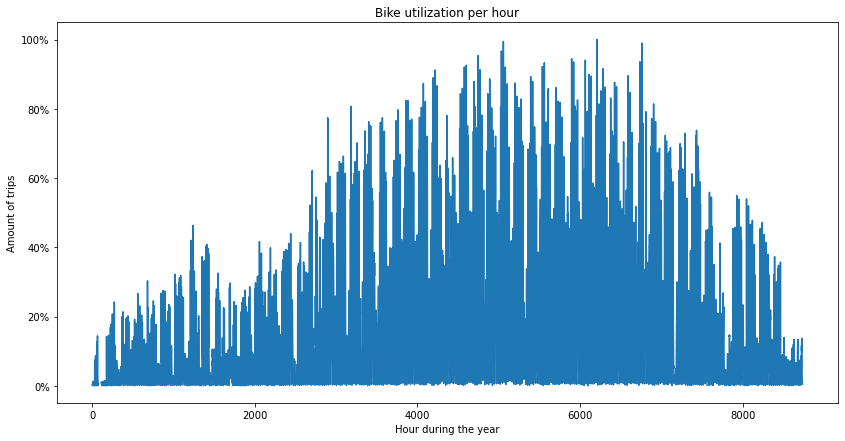

In [24]:
# count the number of trips for each hour of the year
trips_hour_total = trip_data.groupby([pd.DatetimeIndex(trip_data['start_time']).date, trip_data['start_hour']])['duration'].agg('count')

# fill empty hours with 0
trips_hour_total.fillna(0, inplace = True)

# reshape the data into a list
trips_hour_list = trips_hour_total.unstack().values.reshape(1, -1)[0]

# calculate utilization in %, where 100% is the maximum utilization during the year
trips_hour_list = trips_hour_list / max(trips_hour_list)

# create a diagram
plots_trips_time_series, axes_trips_time_series = plt.subplots(figsize = (14,7))
axes_trips_time_series.plot(trips_hour_list)
axes_trips_time_series.set_title('Bike utilization per hour')
axes_trips_time_series.set_xlabel('Hour during the year')
axes_trips_time_series.set_ylabel('Amount of trips')
axes_trips_time_series.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

plt.show()

In [25]:
print(max(trips_hour_list))

1.0


The graph shows the peak utilization in the second part of the year, mostly in the summer. Additionally, clear weekly seasonality is shown, with utilization on the weekends being relatively low. The reasons for that were discussed in the Temporal Demand Patterns part.

There are also some outliers in the data, such as a period right before the 8000 hours mark. This is the Thanksgiving period (22th of November). Knowing such outliers is important for the managers, as they could for example plan maintenance of vehicles during low bike demand.

### 2.4.2 Bike utilization per user type

This KPI shows the amount of trips taken by subcribers/non-subscribers and their corresponding bike utilization. This information is important, because it allows managers to see how successful is the effort of turning users into subscribers, and also how active are each type of users at using the bikes.

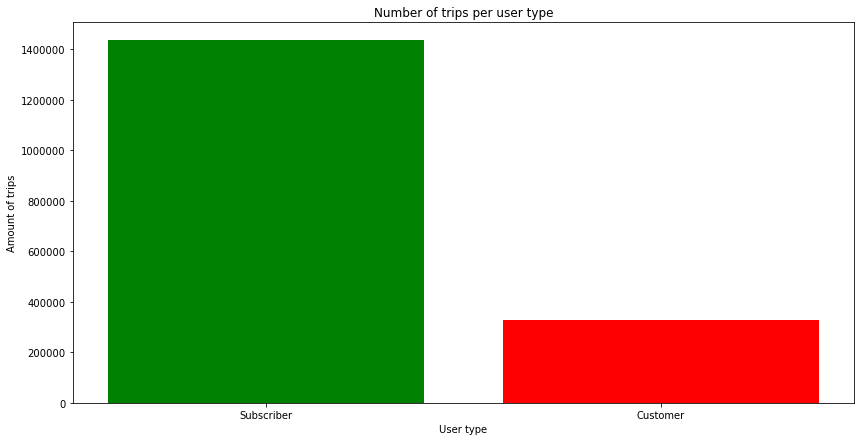

In [26]:
# rearrange the dataframe to count the total number of trips taken by each type of users

trips_subscribers = trip_data[trip_data['user_type'] == 'Subscriber'].groupby(['weekday', 'start_hour'])['start_time'].agg('count').unstack(level = 0)
trips_customers = trip_data[trip_data['user_type'] == 'Customer'].groupby(['weekday', 'start_hour'])['start_time'].agg('count').unstack(level = 0)

# count the total
trips_subscribers = (trips_subscribers.values).sum().sum()
trips_customers = (trips_customers.values).sum().sum()

# create a diagram
plots_trips_users, axes_trips_time_series = plt.subplots(figsize = (14,7))
axes_trips_time_series.bar(['Subscriber', 'Customer'], [trips_subscribers,trips_customers], color = ('green','red'))
axes_trips_time_series.set_title('Number of trips per user type')
axes_trips_time_series.set_xlabel('User type')
axes_trips_time_series.set_ylabel('Amount of trips')
axes_trips_time_series.yaxis.get_major_formatter().set_scientific(False)

plt.show()

The chart clearly shows that the majority of the trips were undertaken by subscribers. This shows that the subscriber program provides significant benefits and users are actively participating. Managers could use this information to try and change subscriber program and see how the numbers react, for example.

How does the utilization look for each type of user?

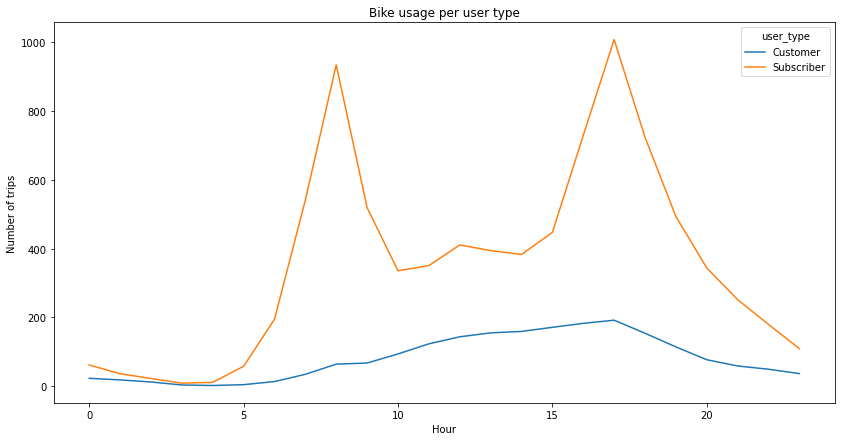

In [27]:
# transform the data for the diagram
trips_hour_user_type = trip_data.groupby(['start_hour','user_type']).count()
trips_hour_user_type = trips_hour_user_type['duration'].unstack()

# divide by 168 (1 week is 7 days @ 24 hours) to get the average trips per hour
trips_hour_user_type = trips_hour_user_type/168

# create the diagram
plots_hour_user_type, axes_hour_user_type = plt.subplots(figsize=(14,7))
trips_hour_user_type.plot(ax=axes_hour_user_type)
plt.title('Bike usage per user type')
plt.xlabel('Hour')
plt.ylabel('Number of trips')

plt.show()

The utilization of bikes by subscribers almost exactly follows the workdays temporal demand pattern when split by weekdays (see in 2.2.4). This indicates that subscribers primarily use the bikes to get to work/school, meanwhile customers use the bikes sporadically (they don't really follow either the working days distribution or the weekend distribution).

Managers could use this information in a dashboard too monitor the behavior of different types of users. If the pattern changes (e.g. subscribers start to use the bikes during the weekdays less), this could indicate a problem in the operation.

### 2.4.3 Amount of traffic per station

Another important KPI shows the traffic per station over the course of the year. This may help managers to see how certain stations are performing and possibly where more bikes are needed.

To understand this, let's take a look at where most rides are starting.

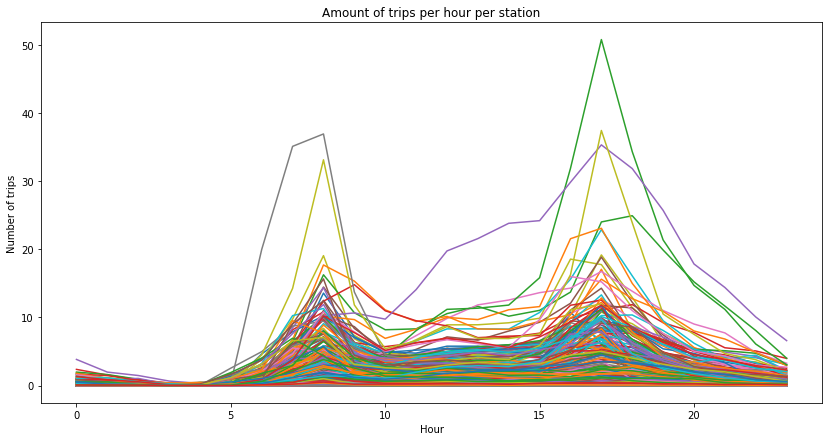

In [28]:
# transform the data for the diagram
trips_hour_station = trip_data.groupby(['start_hour','start_station_name']).count()
trips_hour_station = trips_hour_station['duration'].unstack()

# fill empty hours with 0
trips_hour_station.fillna(0, inplace = True)

# divide by 168 (1 week is 7 days @ 24 hours) to get the average trips per hour
trips_hour_station = trips_hour_station/168

# create the diagram
plots_hour_station, axes_hour_station = plt.subplots(figsize=(14,7))
trips_hour_station.plot(ax=axes_hour_station)
plt.title('Amount of trips per hour per station')
plt.xlabel('Hour')
plt.ylabel('Number of trips')
plt.legend('', frameon=False)

plt.show()

As we see on the graph, there are some clear outliers, which are extremely busy stations. These stations would benefit from a larger than normal fleet of bikes, so that it is possible to provide a high service level.

The graph legend is too large to display on the graph, hence a table represenation would be of assistance in a dashboard.

In [29]:
# create a table overview of the graph
# transpose the table for a better overview
trips_hour_station_table = trips_hour_station.transpose()

trips_hour_station_table.head(5)

start_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
start_station_name,,,,,,,,,,,,,,,,,,,,,
175 N Harvard St,0.261905,0.178571,0.136905,0.065476,0.047619,0.10119,0.595238,3.654762,6.672619,4.107143,...,2.833333,3.279762,4.035714,4.904762,4.452381,3.958333,2.982143,2.226190,1.250000,0.595238
18 Dorrance Warehouse,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.005952,0.011905,...,0.041667,0.011905,0.285714,0.184524,0.113095,0.017857,0.000000,0.005952,0.011905,0.000000
191 Beacon St,0.005952,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.017857,0.095238,0.113095,...,0.041667,0.023810,0.023810,0.047619,0.047619,0.041667,0.041667,0.047619,0.005952,0.005952
30 Dane St.,0.029762,0.005952,0.023810,0.005952,0.000000,0.00000,0.041667,0.172619,0.434524,0.488095,...,0.220238,0.184524,0.309524,0.357143,0.416667,0.410714,0.267857,0.416667,0.178571,0.065476
30 Dane St. (former),0.011905,0.005952,0.000000,0.000000,0.000000,0.00000,0.000000,0.029762,0.101190,0.160714,...,0.041667,0.035714,0.101190,0.101190,0.089286,0.053571,0.059524,0.041667,0.023810,0.035714


Note that in a dashboard application (when created in PowerBI / Tableau etc.) there would be filters and/or slicers for the ease of use. These options are limited in pure Python notebooks.

### 2.4.4 Total revenue per day

The final KPI will show how the fleet is doing in terms of revenue. This is of paramount importance for the managers, as the revenue defines the success of the whole business in many ways.

For revenue calculations we have used the data from Bluebikes official webcite https://www.bluebikes.com/pricing.
Historical data has been taken from https://www.bluebikes.com/system-data.

Bluebikes Pricing Plans (2022; validity for 2018 confirmed by archive.org):<br>
- Single Trip (up to 30 minutes) - Cost <b>3$</b><br>
- Subscribers (up to 45 minutes) - Annual cost <b>99$</b><br> 
- After that, every 30 minutes cost extra (for every plan) - Extra cost <b>2.50$</b>

Furthermore, we assume that all subscribers bought the <b>annual</b> subscription instead of the monthly option, as it is significantly cheaper.

We would like to track the revenue on the daily basis. The revenue is either from customers (who pay for each ride separately) or from subscribers. For that, we need to split the revenue from subscribers (who bought annual passes) into separate trips. To do that, we divide all the sum of revenue from subsribers by the amount of trips taken by subscribers.

In [30]:
# revenue from subscribers
sub_price = 99
sub_count = 18178    #taken from historical data
sub_revenue = sub_price * sub_count
sub_trips_count = len(trip_data[trip_data['user_type'] == 'Subscriber'])
sub_trip_revenue = sub_revenue / sub_trips_count

In [31]:
#revenue from customers
cust_trip_revenue = 3
extra_price = 2.50

In [32]:
#define a function to assign each trip its corresponding revenue
def assign_revenue(row):
    
    
    """
    Calculate the total revenue for the given row
    ...
    
    Arguments
    ---------
    row     : int
            A row in the trips dataset (a single trip)
    
    Returns
    -------
    revenue   : float
            The revenue for the trip (this trip was taken by a subscriber)
    """
    
    
    if row['user_type'] == 'Subscriber':                
        if row['duration'] > 2700:   # subscribers ride 45 minutes for free        
            return row['duration'] // 2700 * extra_price + sub_trip_revenue     
        else:
            return sub_trip_revenue
    
    else:
        if row['duration'] > 1800:   # customers ride 30 minutes for free            
            return row['duration'] // 1800 * extra_price + cust_trip_revenue  
        else:
            return cust_trip_revenue

In [33]:
# apply the function to the trip dataframe
trip_data['revenue'] = trip_data.apply(lambda x: assign_revenue(x), axis = 1) 

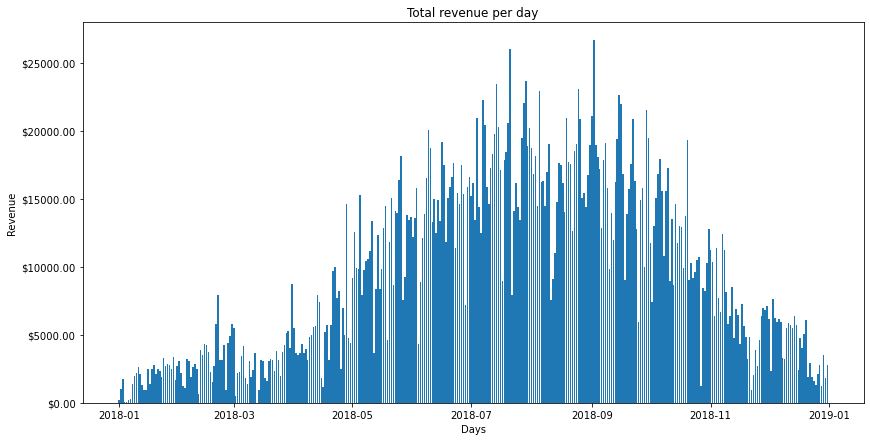

In [34]:
# transform the data for the diagram
total_revenue_day = trip_data.groupby([trip_data['start_time'].dt.date, 'start_hour'])['revenue'].agg('sum')
total_revenue_day = total_revenue_day.unstack()

# fill empty rows with 0
total_revenue_day = total_revenue_day.fillna(0)

# instead of showing the data per hour (as in previous KPIs), aggregate by day for better visibility
total_revenue_day = total_revenue_day.sum(axis = 1)

# create the diagram
plots_revenue_day, axes_revenue_day = plt.subplots(figsize = (14,7))
axes_revenue_day.bar(total_revenue_day.index, total_revenue_day)
axes_revenue_day.yaxis.set_major_formatter('${x:1.2f}')
axes_revenue_day.set_title('Total revenue per day')
axes_revenue_day.set_xlabel('Days')
axes_revenue_day.set_ylabel('Revenue')

plt.show()

The revenue is a lot higher during warmer months (May through October). This distribution is similar to the temporal number of trips distribution throughout the year. From this visual, we can deduce a correlation between the number of trips and the total revenue (which is indeed logical).

For the managers, this KPI shows the total amount of money the company is making from bike rentals. If these numbers go down, this may indicate that something is wrong and the manager must investigate and act on the problem.